## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
#MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.35, 0.45]

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for rate in Dropout_EXP:
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=rate)
    model.summary()
    optimizer = keras.optimizers.adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    work_exp = 'DropOut Rate:{}'.format(rate)
    results[work_exp] = {
        'train_loss':train_loss,
        'valid_loss':valid_loss,
        'train_acc':train_acc,
        'valid_acc':valid_acc
    } 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

50000/50000 [==============================] - 12s 240us/step - loss: 1.8370 - acc: 0.3305 - val_loss: 1.7743 - val_acc: 0.3728
Epoch 9/30
50000/50000 [==============================] - 11s 225us/step - loss: 1.8217 - acc: 0.3330 - val_loss: 1.7871 - val_acc: 0.3702
Epoch 10/30
50000/50000 [==============================] - 11s 226us/step - loss: 1.8193 - acc: 0.3408 - val_loss: 1.7566 - val_acc: 0.3872
Epoch 11/30
50000/50000 [==============================] - 11s 229us/step - loss: 1.8128 - acc: 0.3412 - val_loss: 1.7568 - val_acc: 0.3750
Epoch 12/30
50000/50000 [==============================] - 11s 230us/step - loss: 1.8032 - acc: 0.3426 - val_loss: 1.7307 - val_acc: 0.3955
Epoch 13/30
50000/50000 [==============================] - 11s 230us/step - loss: 1.7961 - acc: 0.3474 - val_loss: 1.7364 - val_acc: 0.3879
Epoch 14/30
50000/50000 [==============================] - 11s 229us/step - loss: 1.7892 - acc: 0.3512 - val_loss: 1.7360 - val_acc: 0.3957
Epoch 15/30
50000/50000 [========

50000/50000 [==============================] - 11s 222us/step - loss: 1.8846 - acc: 0.2991 - val_loss: 1.8789 - val_acc: 0.3262
Epoch 27/30
50000/50000 [==============================] - 11s 227us/step - loss: 1.8960 - acc: 0.2922 - val_loss: 1.8961 - val_acc: 0.3294
Epoch 28/30
50000/50000 [==============================] - 11s 225us/step - loss: 1.8860 - acc: 0.2963 - val_loss: 1.8817 - val_acc: 0.3202
Epoch 29/30
50000/50000 [==============================] - 11s 226us/step - loss: 1.8868 - acc: 0.2979 - val_loss: 1.8895 - val_acc: 0.3145
Epoch 30/30
50000/50000 [==============================] - 11s 227us/step - loss: 1.8806 - acc: 0.3017 - val_loss: 1.8913 - val_acc: 0.3239
0.45
DropOut Rate:0.45


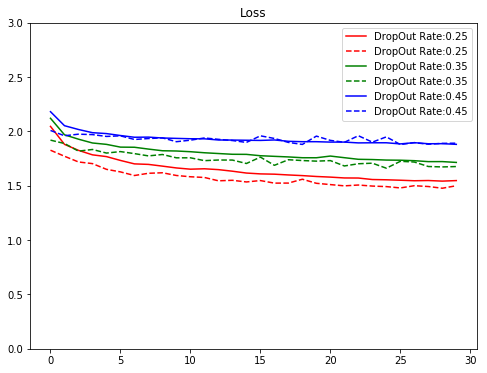

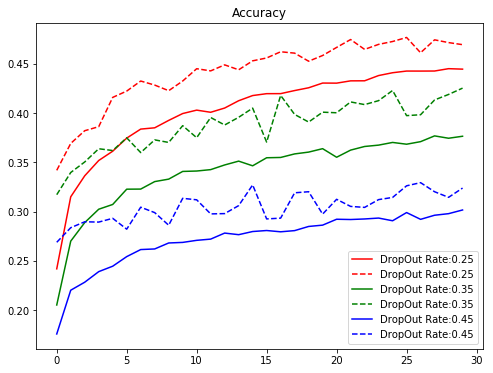

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 2.5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

